# Fannie Mae analysis

(just started)

This notebook contains some python code to analyse mortgage data
See the following link how to download data and [more details](https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html).

Per quarter there is a Acquisition data set and a Performance data set. See the [details here](https://www.fanniemae.com/resources/file/fundmarket/pdf/webinar-101.pdf)


In [47]:
#### using the datatable package from h2o....  super package!
import pandas as pd
import numpy as np
import datatable as dt
import seaborn as sns
import pickle

import sys

## Import acquisition and performance data

The data available on mortgages is per quarter of starting mortgages (from 2000 until 2019). It is a zip containing two text files, for example if we look in the 2010Q1.zip file we have:

* the file Acquisition_2010Q1.txt, it contains all mortgaes that started in Q1 2018, each row is one mortgage,
* the file Performance_2010Q1.txt, it contains the performance of the mortgages in the acquisition file. Multiple rows in this file correspond to one mortgage, For every mortgage we have the monthly performance of the mortgage, form its start until Dec of 2019.

To make things managable I have downloaded only the four zip files corresponding to 2010, unzipped them and concatenated the Acquisition text files to one larger text file and zipped it. I did the same with the performances.

`cat Acq*.txt > acquisition.txt & zip acquisition.zip acquisition.txt`

`cat Perf*.txt > performance.txt & zip performance.zip performance.txt`

I am using the `fread` function from the datatable package, it can import zipped CSV files without extracting them.

In [14]:
%%time
#### import Acquisition data
acquisitions_Variables = [
    "LOAN_ID", "ORIG_CHN", "Seller_Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE",
    "FRST_DTE", "OLTV", "OCLTV", "NUM_BO", "Debt_to_Income", "Borrower_Credit_Score", "FTHB_FLG", "PURPOSE", "PROPERTY_TYPE",
    "NUM_UNIT", "OCC_STAT", "STATE", "ZIP_3", "MI_PCT", "Product_Type", "CSCORE_C", "MI_TYPE", "RELOCATION_FLG"
]

acquisition = dt.fread(
    "data/acquisition2010.zip",
    sep = "|",
    header = None ,
    columns = acquisitions_Variables,
)

acquisition = acquisition.to_pandas()
acquisition = acquisition.assign(start_date = pd.to_datetime(acquisition.ORIG_DTE))
acquisition.shape

CPU times: user 12.6 s, sys: 1.27 s, total: 13.9 s
Wall time: 5.54 s


(1826502, 26)

In [15]:
### five random five records
acquisition.sample(5)

,LOAN_ID,ORIG_CHN,Seller_Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,NUM_UNIT,OCC_STAT,STATE,ZIP_3,MI_PCT,Product_Type,CSCORE_C,MI_TYPE,RELOCATION_FLG,start_date
690112,159195123306,R,OTHER,4.250,68000,180,08/2010,10/2010,95,95.0,...,1,P,TX,767,25.0,FRM,NaN,1.0,N,2010-08-01
1627533,734144301817,R,OTHER,4.250,100000,360,12/2010,01/2011,38,38.0,...,1,P,NE,680,NaN,FRM,NaN,NaN,N,2010-12-01
1800661,965458724928,R,OTHER,4.250,300000,240,09/2010,11/2010,54,54.0,...,1,P,MD,210,NaN,FRM,785.0,NaN,N,2010-09-01
1770842,925723260054,R,"BANK OF AMERICA, N.A.",4.375,554000,360,11/2010,01/2011,59,59.0,...,1,P,NJ,77,NaN,FRM,761.0,NaN,N,2010-11-01
16297,145265431704,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",5.000,116000,360,01/2010,03/2010,95,95.0,...,2,P,WI,532,25.0,FRM,NaN,1.0,N,2010-01-01


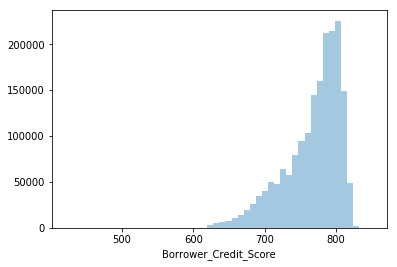

In [17]:
tmp = acquisition.dropna(subset=["Borrower_Credit_Score"])
sns.distplot(tmp.Borrower_Credit_Score, kde=False)

In [19]:
%%time
#### Import performance data
performance_Variables = [
    "LOAN_ID", "Monthly_Rpt_Prd", "Servicer_Name", "LAST_RT", "LAST_UPB", "Loan_Age", "Months_To_Legal_Mat",
    "Adj_Month_To_Mat", "Maturity_Date", "MSA", "Delq_Status", "MOD_FLAG", "Zero_Bal_Code", "ZB_DTE", "LPI_DTE",
    "Foreclosure_date","DISP_DT", "FCC_COST", "PP_COST", "AR_COST", "IE_COST", "TAX_COST", "NS_PROCS", "CE_PROCS", "RMW_PROCS",
    "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"
]

performance = dt.fread(
    "data/performance2010.zip",
    sep = "|",
    header = None ,
    columns = performance_Variables,
)

#performance = performance.to_pandas()
# converting to pandas is not feasible on my Mac
performance.shape

CPU times: user 3min 49s, sys: 1min 40s, total: 5min 29s
Wall time: 1min 54s


(105999627, 31)

In [6]:
#### first 5 records
performance.head(5)

,LOAN_ID,Monthly_Rpt_Prd,Servicer_Name,LAST_RT,LAST_UPB,Loan_Age,Months_To_Legal_Mat,Adj_Month_To_Mat,Maturity_Date,MSA,…,NON_INT_UPB,PRIN_FORG_UPB_FHFA,REPCH_FLAG,PRIN_FORG_UPB_OTH,TRANSFER_FLG
,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,100010079393,02/01/2010,"WELLS FARGO BANK, N.A.",4.875,NA,0,360,360,02/2040,12420,…,NA,NA,,NA,N
1,100010079393,03/01/2010,,4.875,NA,1,359,358,02/2040,12420,…,NA,NA,,NA,N
2,100010079393,04/01/2010,,4.875,NA,2,358,358,02/2040,12420,…,NA,NA,,NA,N
3,100010079393,05/01/2010,,4.875,NA,3,357,357,02/2040,12420,…,NA,NA,,NA,N
4,100010079393,06/01/2010,,4.875,NA,4,356,355,02/2040,12420,…,NA,NA,,NA,N


In [20]:
### converting only 3 columns to pandas is feasible
Delinq = performance[:,["LOAN_ID","Monthly_Rpt_Prd","Delq_Status"]].to_pandas()

## Start with a simple analysis

This will be the easiest in terms of data prep. Look only at mortgages starting in one specific quarter. For the performance we look at foreclosure or not. So if there is a date in the Foreclosure_date column then the mortgage defaulted otherwise the mortgae did not defaulted. This is the worst that can happen to a mortgage. Latwer we will look at a different performance, days past due where the mortgage does not neccesarily goes default.


In [5]:
# pandas code, but not feasible for 2010

#foreclosures = (
#    performance
#    .query("Foreclosure_date != ''")
#    .filter(["LOAN_ID", "Foreclosure_date"])
#)

In [27]:
foreclosures = performance[dt.f.Foreclosure_date != "",["LOAN_ID", "Foreclosure_date"]]

In [22]:
foreclosures = foreclosures.to_pandas()

In [23]:
foreclosures

,LOAN_ID,Foreclosure_date
0,100446401716,11/01/2012
1,100683589832,11/01/2016
2,100960628290,03/01/2015
3,101212627627,05/01/2016
4,101455126320,12/01/2013
...,...,...
6275,998748916895,09/01/2017
6276,998862664293,12/01/2012
6277,999358284451,11/01/2016
6278,999491819310,08/01/2016


In [24]:
%%time
mortgages = (
    acquisition
    .merge(
        foreclosures,
        how="left",
        left_on="LOAN_ID",
        right_on="LOAN_ID"
    )
)

mortgages = (
    mortgages
    .assign(target_foreclosure = mortgages.Foreclosure_date.notna().astype(int))
)

CPU times: user 3.76 s, sys: 2.81 s, total: 6.57 s
Wall time: 7.92 s


In [25]:
mortgages

,LOAN_ID,ORIG_CHN,Seller_Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,STATE,ZIP_3,MI_PCT,Product_Type,CSCORE_C,MI_TYPE,RELOCATION_FLG,start_date,Foreclosure_date,target_foreclosure
0,100010079393,C,"WELLS FARGO BANK, N.A.",4.875,284000,360,01/2010,03/2010,80,80.0,...,TX,787,NaN,FRM,NaN,NaN,N,2010-01-01,NaN,0
1,100013622306,R,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",4.750,87000,180,12/2009,02/2010,63,63.0,...,CA,932,NaN,FRM,785.0,NaN,N,2009-12-01,NaN,0
2,100019943199,R,OTHER,5.000,417000,360,11/2009,01/2010,43,43.0,...,FL,342,NaN,FRM,808.0,NaN,N,2009-11-01,NaN,0
3,100022098429,R,OTHER,5.250,461000,360,01/2010,03/2010,61,61.0,...,NY,112,NaN,FRM,NaN,NaN,N,2010-01-01,NaN,0
4,100023088745,R,"WELLS FARGO BANK, N.A.",5.250,100000,360,11/2009,01/2010,80,80.0,...,OH,446,NaN,FRM,NaN,NaN,N,2009-11-01,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826497,999993753714,R,"WELLS FARGO BANK, N.A.",4.375,97000,180,09/2010,12/2010,36,36.0,...,NC,275,NaN,FRM,NaN,NaN,N,2010-09-01,NaN,0
1826498,999994430501,B,OTHER,3.750,65000,180,11/2010,01/2011,74,74.0,...,TN,384,NaN,FRM,808.0,NaN,N,2010-11-01,NaN,0
1826499,999997933975,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",4.500,186000,360,10/2010,12/2010,43,46.0,...,PA,189,NaN,FRM,781.0,NaN,N,2010-10-01,NaN,0
1826500,999998752557,C,"GMAC MORTGAGE, LLC",4.375,236000,300,08/2010,10/2010,64,64.0,...,MA,24,NaN,FRM,NaN,NaN,N,2010-08-01,NaN,0


We can also look at a different target. First time that a mortgage goes into 90 days or more past due. We can use the column `Delq_Status`, it is the Loan Delinquency status and has the following meaning:

* 0 - "Current or less than 30 days past due"
* 1 - "30 - 59 days past due"
* 2 - "60 - 89 days past due"
* 3 - "90 - 119 days past due"
* 4 - "120 - 149 days past due"
* 5 - "150 - 179 days past due"
* 6 - "180 Day Delinquency"
* 7 - "210 Day Delinquency"
* 8 - "240 Day Delinquency"
* 9 - "270 Day Delinquency" / "270+ Day Delinquency"

In [28]:
### select the status 3
tmp = (
    Delinq
    .query("Delq_Status == '3'")
    .filter(["LOAN_ID", "Monthly_Rpt_Prd", "Delq_Status"])
)

### select the first time when status 3 happened
tmp = (
    tmp
    .assign(date = pd.to_datetime(tmp.Monthly_Rpt_Prd))
    .sort_values(by = ["LOAN_ID", "Monthly_Rpt_Prd"])  
)

perf_90 = tmp.drop_duplicates(subset=["LOAN_ID"])

In [29]:
perf_90

,LOAN_ID,Monthly_Rpt_Prd,Delq_Status,date
18634785,100010962431,09/01/2012,3,2012-09-01
18635016,100020082687,01/01/2018,3,2018-01-01
64357205,100044482443,09/01/2012,3,2012-09-01
1993,100091653134,05/01/2018,3,2018-05-01
36838443,100203636682,10/01/2016,3,2016-10-01
...,...,...,...,...
64351731,999882330981,10/01/2015,3,2015-10-01
105995103,999897801695,05/01/2019,3,2019-05-01
18632763,999919586679,07/01/2016,3,2016-07-01
64353562,999937529584,05/01/2019,3,2019-05-01


In [30]:
mortgages2 = (
    mortgages
    .merge(
        perf_90,
        how="left",
        left_on="LOAN_ID",
        right_on="LOAN_ID"
    )
)

mortgages2 = (
    mortgages2
    .assign(target_90 = mortgages2.date.notna().astype(int))
)

In [31]:
mortgages2

,LOAN_ID,ORIG_CHN,Seller_Name,ORIG_RT,ORIG_AMT,ORIG_TRM,ORIG_DTE,FRST_DTE,OLTV,OCLTV,...,CSCORE_C,MI_TYPE,RELOCATION_FLG,start_date,Foreclosure_date,target_foreclosure,Monthly_Rpt_Prd,Delq_Status,date,target_90
0,100010079393,C,"WELLS FARGO BANK, N.A.",4.875,284000,360,01/2010,03/2010,80,80.0,...,NaN,NaN,N,2010-01-01,NaN,0,NaN,NaN,NaT,0
1,100013622306,R,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",4.750,87000,180,12/2009,02/2010,63,63.0,...,785.0,NaN,N,2009-12-01,NaN,0,NaN,NaN,NaT,0
2,100019943199,R,OTHER,5.000,417000,360,11/2009,01/2010,43,43.0,...,808.0,NaN,N,2009-11-01,NaN,0,NaN,NaN,NaT,0
3,100022098429,R,OTHER,5.250,461000,360,01/2010,03/2010,61,61.0,...,NaN,NaN,N,2010-01-01,NaN,0,NaN,NaN,NaT,0
4,100023088745,R,"WELLS FARGO BANK, N.A.",5.250,100000,360,11/2009,01/2010,80,80.0,...,NaN,NaN,N,2009-11-01,NaN,0,NaN,NaN,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826497,999993753714,R,"WELLS FARGO BANK, N.A.",4.375,97000,180,09/2010,12/2010,36,36.0,...,NaN,NaN,N,2010-09-01,NaN,0,NaN,NaN,NaT,0
1826498,999994430501,B,OTHER,3.750,65000,180,11/2010,01/2011,74,74.0,...,808.0,NaN,N,2010-11-01,NaN,0,NaN,NaN,NaT,0
1826499,999997933975,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",4.500,186000,360,10/2010,12/2010,43,46.0,...,781.0,NaN,N,2010-10-01,NaN,0,NaN,NaN,NaT,0
1826500,999998752557,C,"GMAC MORTGAGE, LLC",4.375,236000,300,08/2010,10/2010,64,64.0,...,NaN,NaN,N,2010-08-01,NaN,0,NaN,NaN,NaT,0


In [33]:
mortgages2.filter(["target_foreclosure", "target_90"]).describe()

,target_foreclosure,target_90
count,1.826502e+06,1.826502e+06
mean,3.438266e-03,1.408977e-02
std,5.853586e-02,1.178612e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00


In [34]:
pickle.dump(mortgages2, open("data/mortgages.pck", "wb"))

#### Variable importances

In [35]:
mortgages2.Seller_Name.value_counts()

OTHER                                             569258
WELLS FARGO BANK, N.A.                            344860
BANK OF AMERICA, N.A.                             254747
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION         211396
CITIMORTGAGE, INC.                                 98308
GMAC MORTGAGE, LLC                                 93533
PHH MORTGAGE CORPORATION                           57509
FLAGSTAR CAPITAL MARKETS CORPORATION               50112
SUNTRUST MORTGAGE INC.                             47666
QUICKEN LOANS INC.                                 25190
NEW YORK COMMUNITY BANK                            21786
FEDERAL HOME LOAN BANK OF CHICAGO                  11514
PROVIDENT FUNDING ASSOCIATES, L.P.                 11467
PNC BANK, N.A.                                     10993
CITIZENS BANK, NATIONAL ASSOCIATION                 8494
GMAC MORTGAGE, LLC (USAA FEDERAL SAVINGS BANK)      5326
U.S. BANK N.A.                                      2558
HSBC BANK USA, NATIONAL ASSOCIA